# Glutarylation

## Global Imports

In [1]:
!pip install lightgbm


import numpy as np
# import seaborn as sns
# sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd

from numpy.random import seed
# from tensorflow import set_random_seed

# from keras.layers import Input, Dropout
# from keras.layers.core import Dense 
# from keras.models import Model, Sequential, load_model
# from keras import regularizers

seed(10)
# set_random_seed(10)

## Load Data

In [2]:
fileName = 'glutarylation.csv'
dataset = pd.read_csv(fileName, header=None, engine='python')
dataset.shape

(4092, 211)

In [3]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,21.0,-4.980,21.0,0.141,10.80,21.0,3.33,8.44,17.5,21.0,...,-9.20,15.4,7.39,-6.15,-6.42,6.48,3.740,4.96,21.0,1
1,21.0,-1.680,21.0,-4.780,12.40,21.0,-2.77,13.00,16.3,21.0,...,-12.30,16.0,8.77,-8.81,-11.60,2.58,-0.128,5.77,21.0,1
2,21.0,-4.630,21.0,-7.720,12.20,21.0,-5.27,11.50,14.3,21.0,...,-11.10,15.1,15.90,-6.37,-12.00,5.33,4.410,4.12,21.0,1
3,21.0,-2.410,21.0,-5.150,10.40,21.0,-4.44,4.43,14.3,21.0,...,-8.88,17.1,12.00,-3.66,-10.50,7.74,-3.680,7.43,21.0,1
4,21.0,0.168,21.0,-6.910,7.02,21.0,-8.05,-1.46,12.5,21.0,...,-5.59,15.0,6.42,-2.58,-7.37,7.19,3.290,7.45,21.0,1


In [4]:
dataset.isnull().any().any()

False

In [5]:
# from sklearn.preprocessing import Imputer 
# imputer= Imputer(missing_values='NaN', strategy='mean' , axis = 0) 
# imputer.fit(dataset)

dataset.fillna(dataset.mean(), inplace=True)

In [6]:
shortCol = []
columns = dataset.columns.tolist()
for i in columns:
  if(dataset[i].nunique() != 1):
    shortCol.append(i)
    #print(i, ": ", dataset[i].nunique())

In [7]:
ttl_data = dataset.iloc[:, shortCol].values
np.random.shuffle(ttl_data)
ttl_data.shape

(4092, 211)

In [8]:
ttl_data[ttl_data[:, -1] == 1].shape

(2169, 211)

In [9]:
ttl_data[ttl_data[:, -1] == 0].shape

(1923, 211)

## Separate Positives & Negatives

In [10]:
pos = ttl_data[ttl_data[:, -1] == 1]
np.random.shuffle(pos)
neg = ttl_data[ttl_data[:, -1] == 0]
np.random.shuffle(neg)

In [11]:
### auto-encoder data ###

# tstSize = 150
# p_test = pos[0:tstSize, ...]
# n_test, n_train = neg[0:tstSize, ...], neg[tstSize:, ...]
# test = np.vstack((p_test, n_test))
# np.random.shuffle(test)
# X_train, X_test, y_train, y_test = n_train[:, :-1], test[:, :-1], n_train[:, -1], test[:, -1]

## Train-Test Split

In [12]:
tstSize = 500
p_test, p_train = pos[0:tstSize, ...], pos[tstSize:, ...]
n_test, n_train = neg[0:tstSize, ...], neg[tstSize:, ...]
train, test = np.vstack((p_train, n_train)), np.vstack((p_test, n_test))
np.random.shuffle(train)
np.random.shuffle(test)
X_train, X_test, y_train, y_test = train[:, :-1], test[:, :-1], train[:, -1], test[:, -1]

In [13]:
print(y_train.shape)
print(y_train[y_train == 1].shape)
print(y_train[y_train == 0].shape)

print('-'*60)

print(y_test.shape)
print(y_test[y_test == 1].shape)
print(y_test[y_test == 0].shape)

(3092,)
(1669,)
(1423,)
------------------------------------------------------------
(1000,)
(500,)
(500,)


## Independent Test Load;

In [14]:
fileName1 = 'Glu_Independent_test.csv'
testFeat = pd.read_csv(fileName1, header=None, engine='python')

In [15]:
ttl_data = testFeat.values
np.random.shuffle(ttl_data)
ttl_data.shape

(137, 211)

In [16]:
X_test, y_test = ttl_data[:, :-1], ttl_data[:, -1]

In [17]:
print(X_test.shape)
print('-'*60)

print(y_test.shape)
print(y_test[y_test == 1].shape)
print(y_test[y_test == 0].shape)

(137, 210)
------------------------------------------------------------
(137,)
(46,)
(91,)


## Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Balance Data

In [19]:
#!pip install imblearn
from imblearn.under_sampling import ClusterCentroids
X_train_res, y_train_res = ClusterCentroids(sampling_strategy='auto').fit_resample(X_train, y_train)

Using TensorFlow backend.
/Users/wakilahmad/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1235) found smaller than n_clusters (1423). Possibly due to duplicate points in X.
  return_n_iter=True)


In [20]:
# from imblearn.over_sampling import SVMSMOTE
# X_train_res, y_train_res = SVMSMOTE().fit_resample(X_train, y_train)

In [21]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy='all')
# X_train_res, y_train_res = tl.fit_resample(X_train_res, y_train_res)

In [22]:
print(y_train_res.shape)
print(y_train_res[y_train_res == 1].shape)
print(y_train_res[y_train_res == 0].shape)

(2846,)
(1423,)
(1423,)


## XGBoost

In [23]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

regr = XGBRegressor(n_estimators=300)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = XGBClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

[15:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
accuracy:  0.8686131386861314

f1_score:  0.7804878048780488

Confusion Matrix
[[87  4]
 [14 32]]
------------------------------------------------------------
accuracy:  0.8029197080291971

f1_score:  0.608695652173913

Confusion Matrix
[[89  2]
 [25 21]]
------------------------------------------------------------


## LightGBM

In [24]:
from lightgbm import LGBMRegressor, LGBMClassifier

regr = LGBMRegressor(num_leaves=31, n_estimators=40, learning_rate=0.1)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

/Users/wakilahmad/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


accuracy:  0.8978102189781022

f1_score:  0.8409090909090908

Confusion Matrix
[[86  5]
 [ 9 37]]
------------------------------------------------------------
accuracy:  0.9124087591240876

f1_score:  0.8571428571428571

Confusion Matrix
[[89  2]
 [10 36]]


## AutoEncoder

In [25]:
# act_func = 'elu'


# model=Sequential()

# model.add(Dense(10,activation=act_func,
#                 kernel_initializer='glorot_uniform',
#                 kernel_regularizer=regularizers.l2(0.0),
#                 input_shape=(X_train.shape[1],)
#                )
#          )

# model.add(Dense(2,activation=act_func,
#                 kernel_initializer='glorot_uniform'))

# model.add(Dense(10,activation=act_func,
#                 kernel_initializer='glorot_uniform'))

# model.add(Dense(X_train.shape[1],
#                 kernel_initializer='glorot_uniform'))

# model.compile(loss='mse',optimizer='adam')


# NUM_EPOCHS=100
# BATCH_SIZE=16

In [26]:
# history=model.fit(np.array(X_train),np.array(X_train),
#                   batch_size=BATCH_SIZE, 
#                   epochs=NUM_EPOCHS,
#                   validation_split=0.05,
#                   verbose = 1)

# plt.plot(history.history['loss'],
#          'b',
#          label='Training loss')
# plt.plot(history.history['val_loss'],
#          'r',
#          label='Validation loss')
# plt.legend(loc='upper right')
# plt.xlabel('Epochs')
# plt.ylabel('Loss, [mse]')
# plt.ylim([0,.1])
# plt.show()

In [27]:
# X_train = pd.DataFrame(X_train, columns=None)
# X_test = pd.DataFrame(X_test, columns=None)
# X_pred = model.predict(np.array(X_train))
# X_pred = pd.DataFrame(X_pred, 
#                       columns=X_train.columns)
# X_pred.index = X_train.index

# scored = pd.DataFrame(index=X_train.index)
# scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
# plt.figure()
# sns.distplot(scored['Loss_mae'],
#              bins = 10, 
#              kde= True,
#             color = 'blue');
# plt.xlim([0.3,6.7])

In [28]:
# X_pred = model.predict(np.array(X_test))
# X_pred = pd.DataFrame(X_pred, columns=None)
# X_pred.index = X_test.index

# scored = pd.DataFrame(index=X_test.index)
# scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
# lo_thrs = 2.4
# up_thrs = 4
# scored['Anomaly'] = ((scored['Loss_mae'] < lo_thrs)|(scored['Loss_mae'] > up_thrs))
# scored.head(10)

In [29]:
# X_pred_train = model.predict(np.array(X_train))
# X_pred_train = pd.DataFrame(X_pred_train, 
#                       columns=X_train.columns)
# X_pred_train.index = X_train.index

# scored_train = pd.DataFrame(index=X_train.index)
# scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
# scored_train['Threshold'] = 0.9
# scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
# scored = pd.concat([scored_train, scored])

In [30]:
# scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [31]:
# y_pred = scored.iloc[:, -1].values

In [32]:
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# acc = accuracy_score(y_test, y_pred)
# print("accuracy: ", acc)
# print()

# f1 = f1_score(y_test, y_pred, average='binary')
# print("f1_score: ", f1)
# print()

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix")
# print(cm)

## Feature Importances

/Users/wakilahmad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


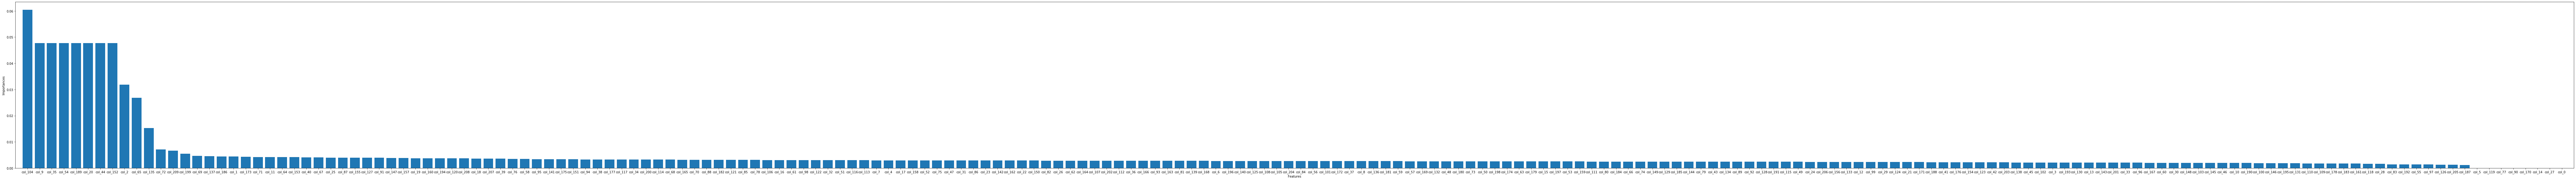

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = model.feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.figure(figsize=(150, 10))
plt.bar(range(X_train.shape[1]), feat_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), ["col_"+str(i) for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.savefig("Feature Importances", bbox_inches='tight')
plt.show()

In [34]:

# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# kf.get_n_splits(X)

# for train_index, test_index in kf.split(X):
#   X_train, X_test = X[train_index], X[test_index]
#   y_train, y_test = y[train_index], y[test_index]

In [35]:
# X, y = ttl_data[:, :-1], ttl_data[:, -1]

# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# classifier = RandomForestClassifier(max_depth=2, random_state=10, n_estimators=300)
# classifier.fit(X, y)

# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# print(accuracies)
# print(accuracies.mean())
# print(accuracies.std())

# Cross Validation

## MLP neural_network

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.83566434 0.86013986 0.81118881 0.84507042 0.73239437 0.67957746
 0.69014085 0.71830986 0.83098592 0.87676056]
accuracy:  0.7880232443612726
0.07090668948283842


In [37]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8467153284671532

f1_score:  0.7586206896551724

Confusion Matrix
[[83  8]
 [13 33]]


## ExtraTrees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.86013986 0.89160839 0.87412587 0.87323944 0.75352113 0.68309859
 0.68661972 0.73591549 0.86971831 0.96126761]
accuracy:  0.8189254407564267
0.09107242065224472


In [39]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.9197080291970803

f1_score:  0.8764044943820224

Confusion Matrix
[[87  4]
 [ 7 39]]


## AdaBoost

In [40]:

from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=300)
boost.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = boost, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.81818182 0.85664336 0.8041958  0.8415493  0.75       0.67605634
 0.67253521 0.72183099 0.83098592 0.90492958]
accuracy:  0.7876908302964641
0.07480500129465846


In [41]:
y_pred = boost.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8540145985401459

f1_score:  0.7777777777777778

Confusion Matrix
[[82  9]
 [11 35]]


## XGBOOST

In [42]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

clf = XGBClassifier()
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())


***CROSS VALIDATION***
[0.86363636 0.87412587 0.85314685 0.85211268 0.75352113 0.68661972
 0.67253521 0.74295775 0.83802817 0.87323944]
accuracy:  0.8009923175416132
0.07510081607942735


In [43]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8029197080291971

f1_score:  0.608695652173913

Confusion Matrix
[[89  2]
 [25 21]]


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({1:1.9, 2:35, 3:180})
#X_train_res, y_train_res = make_classification(n_samples=60, n_features=210,
                           #n_informative=20, n_redundant=0,
                           #random_state=0, shuffle=False)
clf = RandomForestClassifier(bootstrap=True,
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=False,
            random_state=20,
            verbose=0, warm_start=False)
        
#clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=300)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10, scoring='accuracy')
print("***CROSS VALIDATION***")
print(accuracies)
print("mean.accuracy: ", accuracies.mean())
print(accuracies.std())


***CROSS VALIDATION***
[0.87762238 0.87762238 0.86713287 0.86619718 0.75352113 0.65140845
 0.66901408 0.70774648 0.82042254 0.9084507 ]
mean.accuracy:  0.7999138185757904
0.09111842471847353


In [45]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.7956204379562044

f1_score:  0.5757575757575758

Confusion Matrix
[[90  1]
 [27 19]]


## LightGBM

In [46]:
from lightgbm import LGBMRegressor, LGBMClassifier

clf = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.85314685 0.8951049  0.88111888 0.88028169 0.75352113 0.6971831
 0.72887324 0.74295775 0.87676056 0.94014085]
accuracy:  0.8249088939229784
0.08078768342320271


In [47]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.9124087591240876

f1_score:  0.8571428571428571

Confusion Matrix
[[89  2]
 [10 36]]


## Init Scorers

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef
from imblearn.metrics import sensitivity_score, specificity_score

curves = []

def plt_curve(lst, name):
  plt.figure(figsize=(20,10))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
    
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

## XGBoost CV Scores

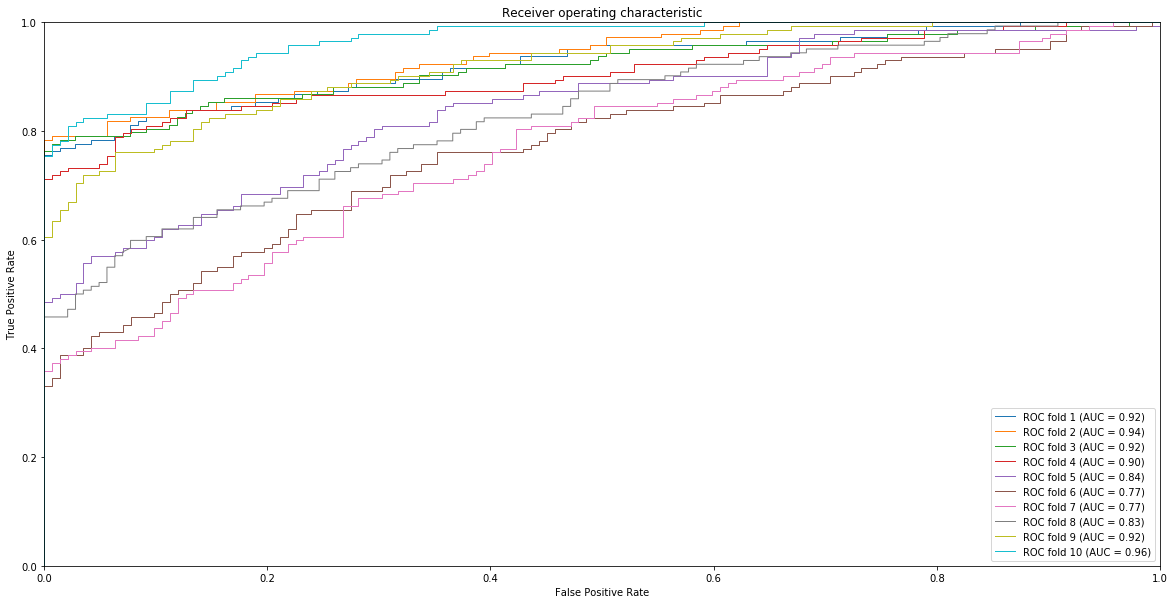

***CROSS VALIDATION***
XGBoost


{'fit_time': array([4.47815776, 4.64630294, 4.39835906, 5.19686413, 4.20044994,
        4.2447269 , 4.55175614, 5.67661166, 4.23255301, 4.50239587]),
 'score_time': array([0.01814699, 0.01207185, 0.02071285, 0.01328611, 0.01400089,
        0.01638007, 0.01717091, 0.01783824, 0.01298213, 0.03026319]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.73246702, 0.75297985, 0.70657018, 0.71450447, 0.53328944,
        0.444219  , 0.38503978, 0.53053384, 0.68959539, 0.74677521]),
 'test_sensitivity_score': array([0.8041958 , 0.81818182, 0.83916084, 0.76760563, 0.59859155,
        0.41549296, 0.45070423, 0.54225352, 0.73943662, 0.85915493]),
 'test_specificity_score': array([0.92307692, 0.93006993, 0.86713287, 0.93661972, 0.9084507 ,
        0.95774648, 0.8943662 , 0.94366197, 0.93661972, 0.88732394])}

In [49]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
classifier = XGBClassifier()

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "XGBoost CV")
print("***CROSS VALIDATION***")
print("XGBoost")
scores
#scores['roc']=curves

## AdaBoost CV Scores

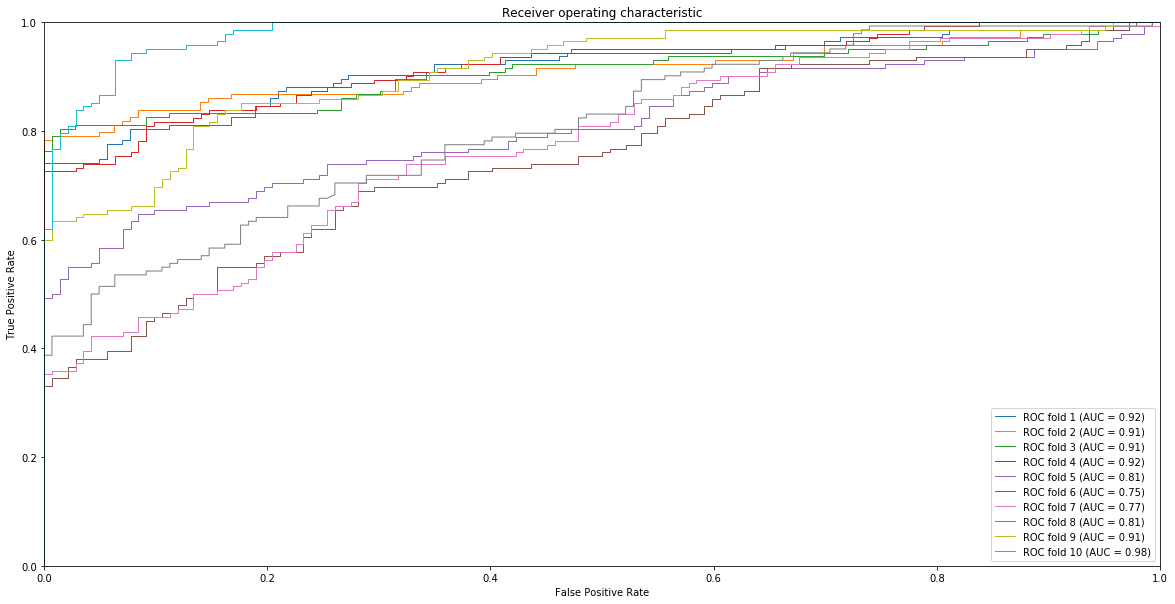

***CROSS VALIDATION***
AdaBoost


{'fit_time': array([14.316221  , 11.33751321, 14.5409832 , 18.62526608, 13.44328523,
        20.7878499 , 15.13208199, 16.88190913, 15.68772316, 19.66622376]),
 'score_time': array([0.26093388, 0.28798509, 0.78236198, 0.72801375, 0.30533099,
        0.27817106, 1.15708804, 0.40858006, 0.44734383, 0.74287915]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.63642588, 0.71330415, 0.6093459 , 0.68325109, 0.50210858,
        0.38575837, 0.35887085, 0.45190618, 0.6620375 , 0.81572594]),
 'test_sensitivity_score': array([0.82517483, 0.86013986, 0.83216783, 0.83098592, 0.70422535,
        0.47183099, 0.53521127, 0.62676056, 0.83802817, 0.96478873]),
 'test_specificity_score': array([0.81118881, 0.85314685, 0.77622378, 0.85211268, 0.79577465,
        0.88028169, 0.80985915, 0.81690141, 0.82394366, 0.84507042])}

In [50]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=300)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "AdaBoost CV")
print("***CROSS VALIDATION***")
print("AdaBoost")
scores
#scores['roc']=curves

## RandomForest CV Scores

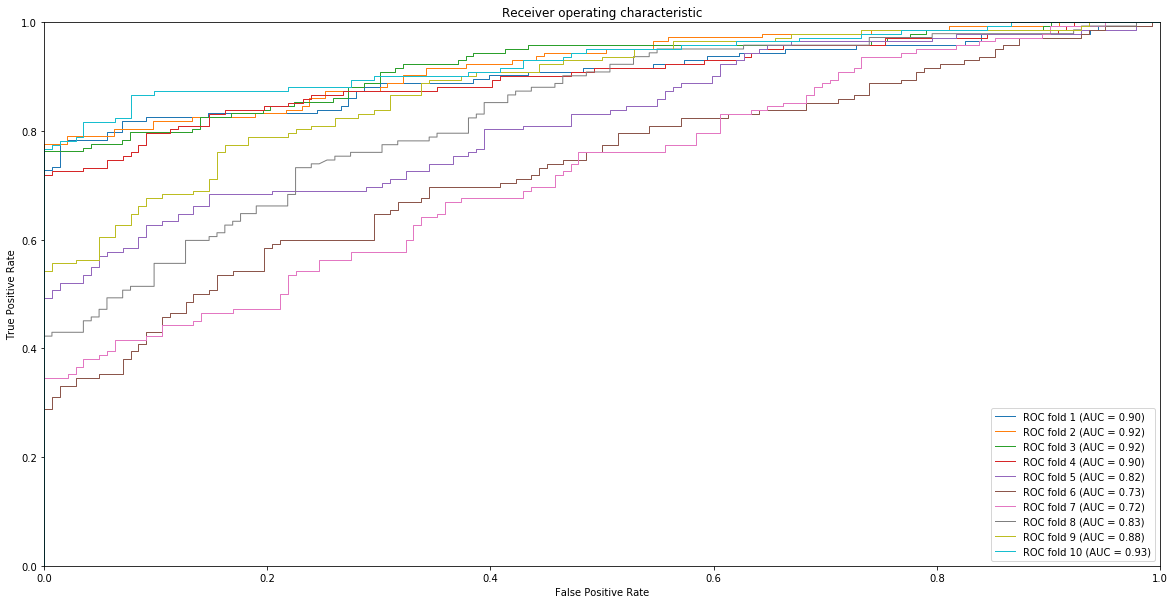

***CROSS VALIDATION***
RandomForest


{'fit_time': array([2.05684018, 2.05732512, 1.56704497, 1.40448713, 1.49854302,
        1.95421314, 1.71724796, 2.38351893, 2.03711271, 1.79656625]),
 'score_time': array([0.24285603, 0.41572714, 0.14380598, 0.1672008 , 0.49339294,
        0.31182289, 0.40127015, 0.38653398, 0.15903807, 0.22747779]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.73888155, 0.79056942, 0.77893618, 0.73152931, 0.55022931,
        0.41076061, 0.44532262, 0.50659369, 0.60990219, 0.7716901 ]),
 'test_sensitivity_score': array([0.70629371, 0.76923077, 0.75524476, 0.6971831 , 0.46478873,
        0.28873239, 0.33098592, 0.4084507 , 0.54225352, 0.74647887]),
 'test_specificity_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [51]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=300)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "RandomForest CV")
print("***CROSS VALIDATION***")
print("RandomForest")
scores
#scores['roc']=curves

## LightGBM CV Scores

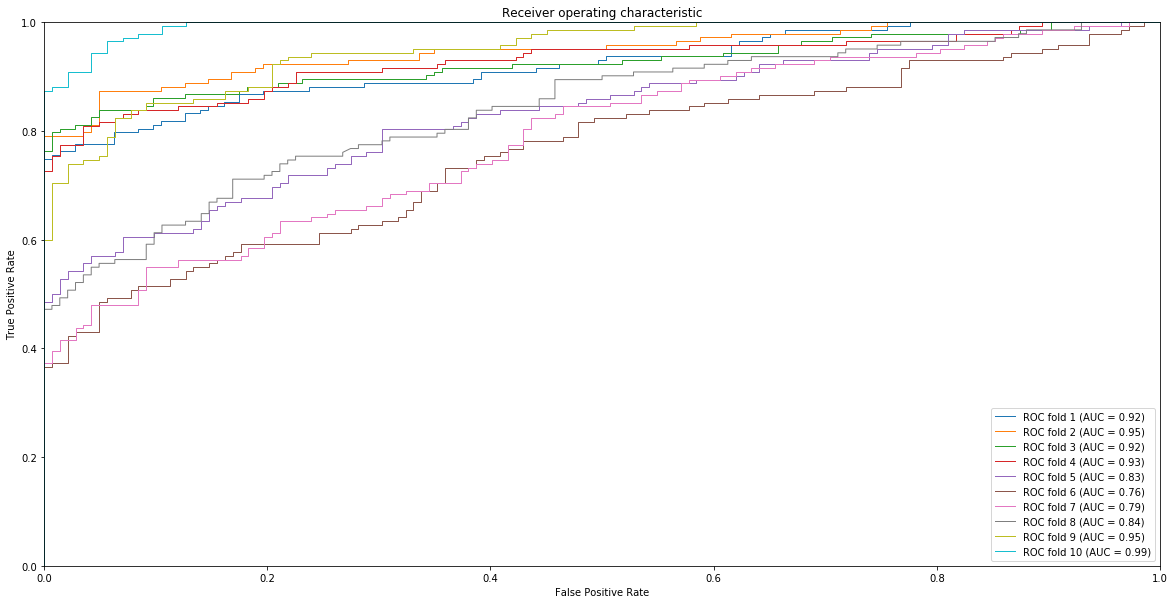

***CROSS VALIDATION***
LightGBM


{'fit_time': array([1.85183501, 1.2426753 , 1.78059697, 1.921314  , 2.03215599,
        1.52229285, 1.20258093, 1.88123393, 1.272609  , 1.25763512]),
 'score_time': array([0.01021314, 0.01387691, 0.01685095, 0.01199007, 0.01531291,
        0.01928711, 0.00979209, 0.0138371 , 0.01330423, 0.00896192]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.70879375, 0.79090628, 0.7629096 , 0.764287  , 0.52844126,
        0.45754322, 0.49047176, 0.51493971, 0.75443835, 0.88523449]),
 'test_sensitivity_score': array([0.81118881, 0.87412587, 0.86013986, 0.83098592, 0.61267606,
        0.44366197, 0.54929577, 0.57746479, 0.85211268, 0.99295775]),
 'test_specificity_score': array([0.8951049 , 0.91608392, 0.9020979 , 0.92957746, 0.8943662 ,
        0.95070423, 0.9084507 , 0.9084507 , 0.90140845, 0.88732394])}

In [52]:
from lightgbm import LGBMRegressor, LGBMClassifier
classifier = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "LightGBM CV")
print("***CROSS VALIDATION***")
print("LightGBM")
scores
#scores['roc']=curves

## MLP CV Scores

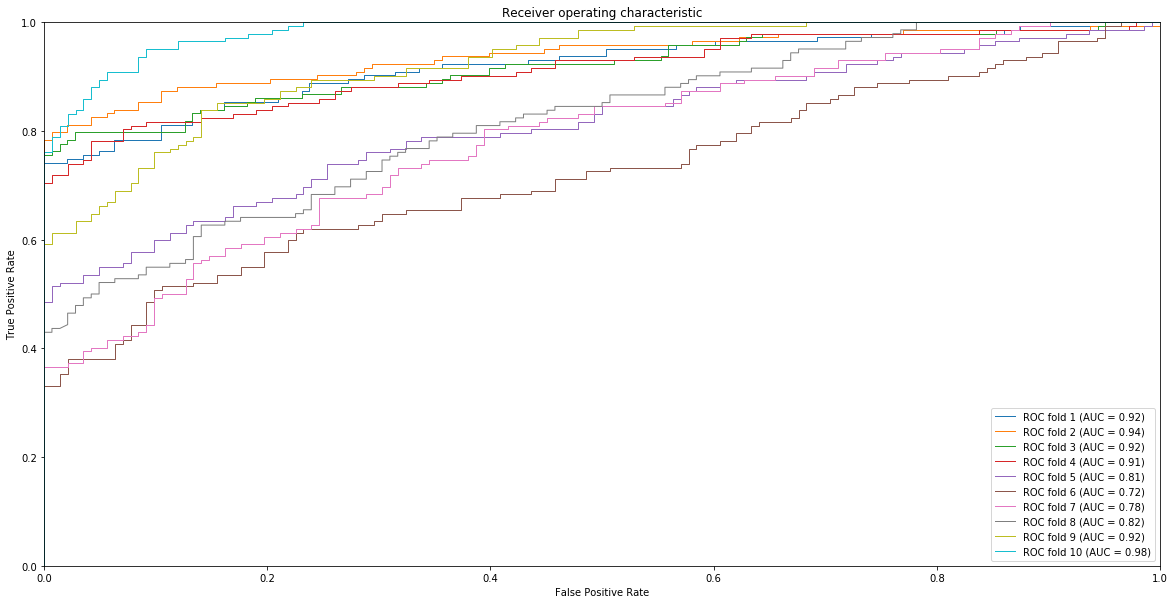

***CROSS VALIDATION***
Multi-Layer Perceptron


{'fit_time': array([5.14417696, 6.16945839, 5.05817199, 4.96567106, 2.50680614,
        4.36986709, 6.79635406, 6.11169815, 4.02715111, 5.58879638]),
 'score_time': array([0.01441789, 0.00539804, 0.0055759 , 0.00567007, 0.00577307,
        0.00987697, 0.01898098, 0.0117569 , 0.00541592, 0.01090479]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.68533144, 0.68816424, 0.63286194, 0.69858764, 0.49362588,
        0.4227014 , 0.4321098 , 0.47016235, 0.66982845, 0.82213696]),
 'test_sensitivity_score': array([0.84615385, 0.88811189, 0.86713287, 0.81690141, 0.65492958,
        0.47183099, 0.57042254, 0.55633803, 0.80985915, 0.96478873]),
 'test_specificity_score': array([0.83916084, 0.7972028 , 0.76223776, 0.88028169, 0.83098592,
        0.9084507 , 0.84507042, 0.88732394, 0.85915493, 0.85211268])}

In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001)

curves = []

scores = cross_validate(clf, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "MLP CV")
print("***CROSS VALIDATION***")
print("Multi-Layer Perceptron")
scores
#scores['roc']=curves

## Extra Trees CV Scores

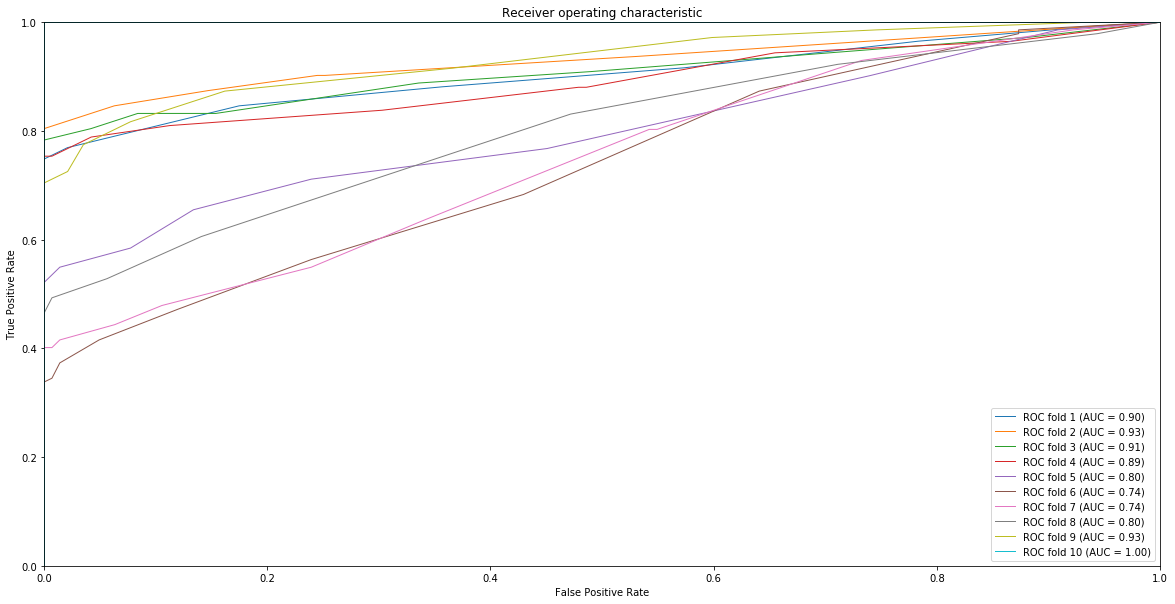

***CROSS VALIDATION***
Extra Trees


{'fit_time': array([0.05697632, 0.05953407, 0.10563278, 0.07508111, 0.0831821 ,
        0.06309581, 0.05478668, 0.05912423, 0.10496283, 0.068326  ]),
 'score_time': array([0.00993991, 0.01788306, 0.0139091 , 0.01794887, 0.01290393,
        0.00974011, 0.01338816, 0.01074386, 0.01510024, 0.01304007]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.7260546 , 0.78647342, 0.75090031, 0.75737474, 0.53875556,
        0.433514  , 0.41033522, 0.51872566, 0.74359697, 0.9253157 ]),
 'test_sensitivity_score': array([0.7972028 , 0.84615385, 0.83216783, 0.78873239, 0.58450704,
        0.41549296, 0.47887324, 0.52816901, 0.81690141, 1.        ]),
 'test_specificity_score': array([0.92307692, 0.93706294, 0.91608392, 0.95774648, 0.92253521,
        0.95070423, 0.8943662 , 0.94366197, 0.92253521, 0.92253521])}

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

curves = []

scores = cross_validate(clf, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "Extra Trees CV")
print("***CROSS VALIDATION***")
print("Extra Trees")
scores
#scores['roc']=curves

## ROC Comparisons of all Estimators and Average Precision

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

tprs = []
def plt_curve(lst, name):
  plt.figure(figsize=(10,7))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    tprs.append(interp(np.linspace(0, 1, 100), fpr, tpr))
    tprs[-1][0] = 0.0
#     plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Random Guess', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)
  std_auc = np.std(aucs)
  plt.plot(mean_fpr, mean_tpr, color='b',
         label='% fold cross validation (AUC = %0.2f)' % (mean_auc),
         lw=2, alpha=.8)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

def pr_curve(lst, apLst, name):
  plt.figure(figsize=(10,7))
  
  f_scores = np.linspace(0.2, 0.8, num=4)
  for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))
  
  for idx, itm in enumerate(lst):
    pre, rec = itm
    plt.plot(pre, rec, lw=2, label='Precision-Recall fold %d (AP = %0.2f)' % (idx+1, apLst[idx]))
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def pr_plt(y_true, y_score):
  precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
  pr_curves.append([precision, recall])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'pr_plt': make_scorer(pr_plt, needs_proba=True), 
         'average_precision': make_scorer(average_precision_score, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

***Independent Test***
matthews_corrcoef for XGBoost:  0.549056128415958

sensitivity_score for XGBoost:  0.45652173913043476

specificity_score for XGBoost:  0.978021978021978

***Independent Test***
matthews_corrcoef for AdaBoost:  0.6695285505492636

sensitivity_score for AdaBoost:  0.7608695652173914

specificity_score for AdaBoost:  0.9010989010989011

***Independent Test***
matthews_corrcoef for LightGBM:  0.8023503593466346

sensitivity_score for LightGBM:  0.782608695652174

specificity_score for LightGBM:  0.978021978021978

***Independent Test***
matthews_corrcoef for ET:  0.8180640387968653

sensitivity_score for ET:  0.8478260869565217

specificity_score for ET:  0.9560439560439561

***Independent Test***
matthews_corrcoef for MLP:  0.6399904443382705

sensitivity_score for MLP:  0.7608695652173914

specificity_score for MLP:  0.8791208791208791

***Independent Test***
matthews_corrcoef for Random Forest:  0.537745240582012

sensitivity_score for Random Forest:  0.413043478

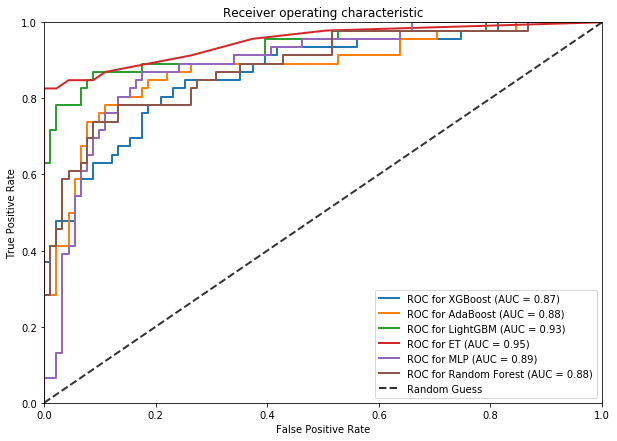

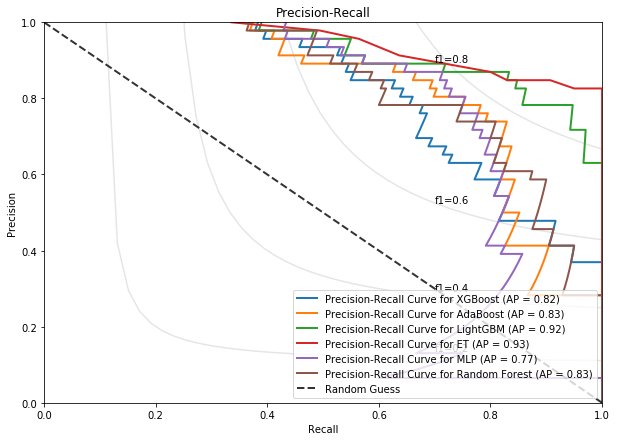

In [56]:
estimators = {
              "XGBoost": XGBClassifier(),
              "AdaBoost": AdaBoostClassifier(n_estimators=300),
              "LightGBM": LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1),
              "ET": ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),
              "MLP": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001),
              "Random Forest": RandomForestClassifier(bootstrap=True,
                        criterion='gini',
                        max_depth=8, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=4, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, n_estimators=300,
                        oob_score=False,
                        random_state=20,
                        verbose=0, warm_start=False)
}

probas_pred = []
avg_pre = []

plt.figure(figsize=(10,7))

for key, clf in estimators.items():
  clf.fit(X_train_res, y_train_res)
  y_pred = clf.predict(X_test)
  y_score = clf.predict_proba(X_test)
  probas_pred.append(y_score)
  avg_pre.append(average_precision_score(y_test, y_score[:, 1], pos_label=1))

  fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
  
  plt.plot(fpr, tpr, lw=2, label='ROC for %s (AUC = %0.2f)' % (key, auc(fpr, tpr)))
  print("***Independent Test***")
  mat_cor_coef = matthews_corrcoef(y_test, y_pred)
  print("matthews_corrcoef for " + key + ": ", mat_cor_coef)
  print()

  sen_scr = sensitivity_score(y_test, y_pred)
  print("sensitivity_score for " + key + ": ", sen_scr)
  print()

  spe_scr = specificity_score(y_test, y_pred)
  print("specificity_score for " + key + ": ", spe_scr)
  print()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
figName = "Compare_All_ROC" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()


plt.figure(figsize=(10,7))

f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
  x = np.linspace(0.01, 1)
  y = f_score * x / (2 * x - f_score)
  l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
  plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))

keyZ = list(estimators.keys())
for idx, y_score in enumerate(probas_pred):
  pre, rec, _ = precision_recall_curve(y_test, y_score[:, 1], pos_label=1)
  
  plt.plot(pre, rec, lw=2, label='Precision-Recall Curve for %s (AP = %0.2f)' % (keyZ[idx], avg_pre[idx]))
plt.plot([1, 0], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)  
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc="lower right")
figName = "Compare_All_Precision-Recall" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()

## Cross Validation Curve

In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

def auROCplot():
    ### auROC ###
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Random')
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    # plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')

    plt.savefig('cvAuROC.png', dpi=100)
    plt.show()
    ### --- ###

    
def runAll(X, y):
    Names = []
    Classifiers = []
    estimators = {
              "XGBoost": XGBClassifier(),
              "AdaBoost": AdaBoostClassifier(n_estimators=300),
              "LightGBM": LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1),
              "ET": ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),
              "MLP": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001),
              "Random Forest": RandomForestClassifier(bootstrap=True,
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=False,
            random_state=20,
            verbose=0, warm_start=False)
}

    for key, value in estimators.items():
        Names.append(key)
        Classifiers.append(value)

    Results = []  # compare algorithms

    from sklearn.metrics import accuracy_score, \
        confusion_matrix, \
        roc_auc_score,\
        average_precision_score,\
        roc_curve, f1_score, recall_score, matthews_corrcoef, auc

    # Step 05 : Spliting with 10-FCV :
    from sklearn.model_selection import StratifiedKFold

    cv = StratifiedKFold(n_splits=10, shuffle=True)

    for classifier, name in zip(Classifiers, Names):

        accuray = []
        auROC = []
        avePrecision = []
        F1_Score = []
        AUC = []
        MCC = []
        Recall = []

        mean_TPR = 0.0
        mean_FPR = np.linspace(0, 1, 100)

        CM = np.array([
            [0, 0],
            [0, 0],
        ], dtype=int)

        print(classifier.__class__.__name__)

        model = classifier
        for (train_index, test_index) in cv.split(X, y):

            X_train = X[train_index]
            X_test = X[test_index]

            y_train = y[train_index]
            y_test = y[test_index]

            model.fit(X_train, y_train)


            # Calculate ROC Curve and Area the Curve
            y_proba = model.predict_proba(X_test)[:, 1]
            FPR, TPR, _ = roc_curve(y_test, y_proba)
            mean_TPR += np.interp(mean_FPR, FPR, TPR)
            mean_TPR[0] = 0.0
            roc_auc = auc(FPR, TPR)
            ##########################################
            # print(FPR)
            # print(TPR)
            ##########################################

            y_artificial = model.predict(X_test)

            auROC.append(roc_auc_score(y_test, y_proba))

            accuray.append(accuracy_score(y_pred=y_artificial, y_true=y_test))
            avePrecision.append(average_precision_score(y_test, y_proba)) # auPR
            F1_Score.append(f1_score(y_true=y_test, y_pred=y_artificial))
            MCC.append(matthews_corrcoef(y_true=y_test, y_pred=y_artificial))
            Recall.append(recall_score(y_true=y_test, y_pred=y_artificial))
            AUC.append(roc_auc)

            CM += confusion_matrix(y_pred=y_artificial, y_true=y_test)

        accuray = [_*100.0 for _ in accuray]
        Results.append(accuray)

        mean_TPR /= cv.get_n_splits(X, y)
        mean_TPR[-1] = 1.0
        mean_auc = auc(mean_FPR, mean_TPR)
        plt.plot(
            mean_FPR,
            mean_TPR,
            linestyle='-',
            label='{} ({:0.3f})'.format(name, mean_auc), lw=2.0)

        print('Accuracy: {0:.4f} %'.format(np.mean(accuray)))
        # print('auROC: {0:.6f}'.format(np.mean(auROC)))
        print('auROC: {0:.6f}'.format(mean_auc))
        print('auPR: {0:.4f}'.format(np.mean(avePrecision))) # average_Precision
        print('F1-score: {0:.4f}'.format(np.mean(F1_Score)))
        print('MCC: {0:.4f}'.format(np.mean(MCC)))
        # print('average_AUC:', np.mean(AUC))
        # tn, fp, fn, tp = CM.ravel()
        TN, FP, FN, TP = CM.ravel()
        print('Recall: {0:.4f}'.format( np.mean(Recall)) )
        # print('AUC: {0:.4f}'.format( np.mean(AUC)) )
        print('Sensitivity (+): {0:.4f} %'.format( float( (TP) / (TP + FN) )*100.0 ))
        print('Specificity (-): {0:.4f} %'.format( float( (TN) / (TN + FP) )*100.0 ))
        print('Confusion Matrix:')
        print(CM)

        print('_______________________________________')

    ### auROC Curve ###
    auROCplot()

    
runAll(X_train_res, y_train_res)

XGBClassifier
Accuracy: 79.7934 %
auROC: 0.875313
auPR: 0.9071
F1-score: 0.7718
MCC: 0.6133
Recall: 0.6823
Sensitivity (+): 68.2361 %
Specificity (-): 91.3563 %
Confusion Matrix:
[[1300  123]
 [ 452  971]]
_______________________________________
AdaBoostClassifier
Accuracy: 78.7760 %
auROC: 0.862008
auPR: 0.8992
F1-score: 0.7806
MCC: 0.5769
Recall: 0.7554
Sensitivity (+): 75.5446 %
Specificity (-): 82.0098 %
Confusion Matrix:
[[1167  256]
 [ 348 1075]]
_______________________________________
LGBMClassifier
Accuracy: 82.5034 %
auROC: 0.893702
auPR: 0.9219
F1-score: 0.8065
MCC: 0.6624
Recall: 0.7301
Sensitivity (+): 73.0148 %
Specificity (-): 91.9888 %
Confusion Matrix:
[[1309  114]
 [ 384 1039]]
_______________________________________
ExtraTreesClassifier
Accuracy: 80.8177 %
auROC: 0.852589
auPR: 0.8857
F1-score: 0.7844
MCC: 0.6327
Recall: 0.7007
Sensitivity (+): 70.0632 %
Specificity (-): 91.5671 %
Confusion Matrix:
[[1303  120]
 [ 426  997]]
_______________________________________
MLP

In [ ]:
##P-values of Beta Coefficients